<a href="https://colab.research.google.com/github/unclepete-20/lab3-svm/blob/main/Lab_3_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines - SVM
## Laboratorio 3
## Integrantes:
- Pedro Pablo Arriola Jiménez (20188)
- José Rodrigo Barrera (20807)

## [Fraude en el Vino](https://en.wikipedia.org/wiki/Wine_fraud)

El fraude en el vino se relaciona a los aspectos comerciales del vino.  El tipo más prevalente de fraude es aquel en el cual los vinos son adulterados, generalmente con la adición de productos más baratos (e.g. jugos) y, a veces, con químicos dañinos y endulcorantes (para compensar el color o sabor).

La falsificación y la re-etiquetación de vinos inferiores y más baratos haciéndolos parecer marcas más caras es otro tipo común de fraude con vino.

<img src="https://github.com/unclepete-20/lab3-svm/blob/main/wine.jpeg?raw=1">

## Objetivos del Laboratorio

Una compañía distribuidora, que recientemente fue víctima de fraude, ha completado una auditoría de varias muestras de vino a través del uso de análisis químico.  La compañía se especializa en la exportación de vinos de una calidad extremadamente alta y muy valiosos.  El fraude fue cometido por un proveedor que intentó pasar vinos baratos, de calidad inferior, como vinos de más alta gama.  La compañía distribuidora los ha contratado a Ustedes para intentar crear un modelo de aprendizaje de máquina (ML) que pueda ayudar a detectar muestras de vino de calidad baja ("fraude").  Quieren saber si siquiera es posible detectar tal diferencia.  


Fuente de datos: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

---
---

**La meta general es utilizar el conjunto de datos adjunto para desarrollar un modelo que intenta predecir si un vino es legítimo "Legit" o fraudulento "Fraud" basado en varias características químicas.**

---
---

**Rubrica**

**(50 puntos) Análisis Exploratorio:**
* Identifica el tipo de archivo .data y la forma de leerlo
* Estudia las variables cuantitativas mediante técnicas de estadística descriptiva
* Hace gráficos exploratorios como histogramas, diagramas de cajas y bigotes, gráficos de dispersión que ayudan a explicar los datos
* Analiza las correlaciones entre las variables, trata de explicar los outliers (datos atípicos) y toma decisiones acertadas ante la presencia de valores faltantes.
* Estudia las variables categóricas
* Elabora gráficos de barra, tablas de frecuencia y de proporciones
* Elabora gráficos adecuados según el tipo de dato que representan
* Explica muy bien todos los procedimientos y los hallazgos que va haciendo.
* Realiza la limpieza de datos para que se tenga un conjunto de datos que permita usar modelos

**(36 puntos) Clasificación**
* Realiza varios modelos de Clasificación, analiza los resultados para identificar el de mejor rendimiento
        
**(14 puntos) Hallazgos y conclusiones.**
* Hace la recomendación correcta para la Compañía Distribuidora

# 1.1 - Limpieza de datos

In [1]:
# Se importan las librerias que permitiran leer el archivo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Aqui cargamos los datos de los vinos
data = pd.read_csv("wine_fraud.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Legit,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Legit,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Legit,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Legit,white


In [3]:
# Se codificaran las columnas de quality y type para tener datos numericos en su totalidad

# crear variables ficticias para la columna "quality"
quality_dummies = pd.get_dummies(data['quality'], prefix='quality')

# crear variables ficticias para la columna "type"
type_dummies = pd.get_dummies(data['type'], prefix='type')

# agregar las variables ficticias al DataFrame original
data = pd.concat([data, quality_dummies, type_dummies], axis=1)

# eliminar las columnas originales "quality" y "type"
data.drop(['quality', 'type'], axis=1, inplace=True)

# Ahora se muestra el dataframe
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_Fraud,quality_Legit,type_red,type_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,1,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,1,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,1,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0,1,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0,1,0,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0,1,0,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0,1,0,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0,1,0,1


In [4]:
# Por convencion, es necesario normalizar los datos para entrenar los modelos de SVM y SVC
from sklearn.preprocessing import StandardScaler

# normalizar las características numéricas
scaler = StandardScaler()
numerical_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Se muestra la informacion normalizada
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_Fraud,quality_Legit,type_red,type_white
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,0,1,1,0
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,0,1,1,0
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,0,1,1,0
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,0,1,1,0
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.783214,-0.787650,-0.197054,-0.807837,-0.486252,-0.367664,-0.420128,-1.186161,0.320319,-0.210144,0.593818,0,1,0,1
6493,-0.474652,-0.119460,0.284686,0.537425,-0.257883,1.491697,0.924588,0.067824,-0.426067,-0.478971,-0.747766,0,1,0,1
6494,-0.551792,-0.605417,-0.885253,-0.891916,-0.429160,-0.029599,-0.083949,-0.719251,-1.421248,-0.478971,-0.915464,0,1,0,1
6495,-1.323198,-0.301694,-0.128234,-0.912936,-0.971538,-0.593041,-0.101642,-2.003251,0.755710,-1.016626,1.935402,0,1,0,1


In [5]:
# Ahora se manejan valores faltantes, atipicos y duplicados

# Manejar valores faltantes
data.fillna(data.median(), inplace=True)

# Identificar valores atípicos y eliminarlos
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
df = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Eliminar filas duplicadas
data.drop_duplicates(inplace=True)

# Se muestra nuevamente el dataframe con los cambios
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_Fraud,quality_Legit,type_red,type_white
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,0,1,1,0
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,0,1,1,0
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,0,1,1,0
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,0,1,1,0
5,0.142473,1.945855,-2.192833,-0.765798,0.541412,-0.987451,-1.340197,1.034993,1.813090,0.193097,-0.915464,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.783214,-0.787650,-0.197054,-0.807837,-0.486252,-0.367664,-0.420128,-1.186161,0.320319,-0.210144,0.593818,0,1,0,1
6493,-0.474652,-0.119460,0.284686,0.537425,-0.257883,1.491697,0.924588,0.067824,-0.426067,-0.478971,-0.747766,0,1,0,1
6494,-0.551792,-0.605417,-0.885253,-0.891916,-0.429160,-0.029599,-0.083949,-0.719251,-1.421248,-0.478971,-0.915464,0,1,0,1
6495,-1.323198,-0.301694,-0.128234,-0.912936,-0.971538,-0.593041,-0.101642,-2.003251,0.755710,-1.016626,1.935402,0,1,0,1


# 1.2 - Análisis exploratorio

In [6]:
# Comencemos explorando la forma de nuestros datos

# Se exploran los primeros 5 datos
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_Fraud,quality_Legit,type_red,type_white
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,0,1,1,0
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,0,1,1,0
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,0,1,1,0
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,0,1,1,0
5,0.142473,1.945855,-2.192833,-0.765798,0.541412,-0.987451,-1.340197,1.034993,1.813090,0.193097,-0.915464,0,1,1,0


In [7]:
# Ahora se exploran los 5 ultimos datos
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_Fraud,quality_Legit,type_red,type_white
6492,-0.783214,-0.787650,-0.197054,-0.807837,-0.486252,-0.367664,-0.420128,-1.186161,0.320319,-0.210144,0.593818,0,1,0,1
6493,-0.474652,-0.119460,0.284686,0.537425,-0.257883,1.491697,0.924588,0.067824,-0.426067,-0.478971,-0.747766,0,1,0,1
6494,-0.551792,-0.605417,-0.885253,-0.891916,-0.429160,-0.029599,-0.083949,-0.719251,-1.421248,-0.478971,-0.915464,0,1,0,1
6495,-1.323198,-0.301694,-0.128234,-0.912936,-0.971538,-0.593041,-0.101642,-2.003251,0.755710,-1.016626,1.935402,0,1,0,1
6496,-0.937495,-0.787650,0.422326,-0.975995,-1.028631,-0.480353,-0.313966,-1.763127,0.258120,-1.419867,1.096912,0,1,0,1


In [8]:
# Ahora se exploran los tipos de datos y la cantidad
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5320 entries, 0 to 6496
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality_Fraud         5320 non-null   uint8  
 12  quality_Legit         5320 non-null   uint8  
 13  type_red              5320 non-null   uint8  
 14  type_white            5320 non-null   uint8  
dtypes: float64(11), uint8

In [9]:
# Se describen los datos estadisticamente
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_Fraud,quality_Legit,type_red,type_white
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,-0.000099,0.027115,-0.000956,-0.082977,0.018726,-0.027533,-0.028939,-0.053806,0.038331,0.014039,0.048163,0.044361,0.955639,0.255451,0.744549
std,1.018002,1.022017,1.012736,0.945925,1.052308,1.003212,1.004542,0.989015,0.997539,1.006375,0.994393,0.205915,0.205915,0.436155,0.436155
min,-2.634589,-1.577330,-2.192833,-1.018034,-1.342639,-1.663583,-1.941780,-2.530192,-3.100615,-2.091935,-2.089350,0.000000,0.000000,0.000000,0.000000
25%,-0.628933,-0.666161,-0.541153,-0.765798,-0.514799,-0.818419,-0.738613,-0.832644,-0.674862,-0.680592,-0.831615,0.000000,1.000000,0.000000,0.000000
50%,-0.166089,-0.240949,-0.059414,-0.576620,-0.257883,-0.142287,0.004519,-0.015553,-0.052874,-0.142937,-0.076974,0.000000,1.000000,0.000000,1.000000
75%,0.373895,0.427241,0.559966,0.432326,0.284496,0.590188,0.663607,0.691481,0.693511,0.461924,0.761516,0.000000,1.000000,1.000000,1.000000
max,6.699425,7.534354,9.231281,12.686822,15.842187,14.563567,5.737257,14.768791,4.923029,9.870879,3.696231,1.000000,1.000000,1.000000,1.000000


### 1.2.1 - Gráficos

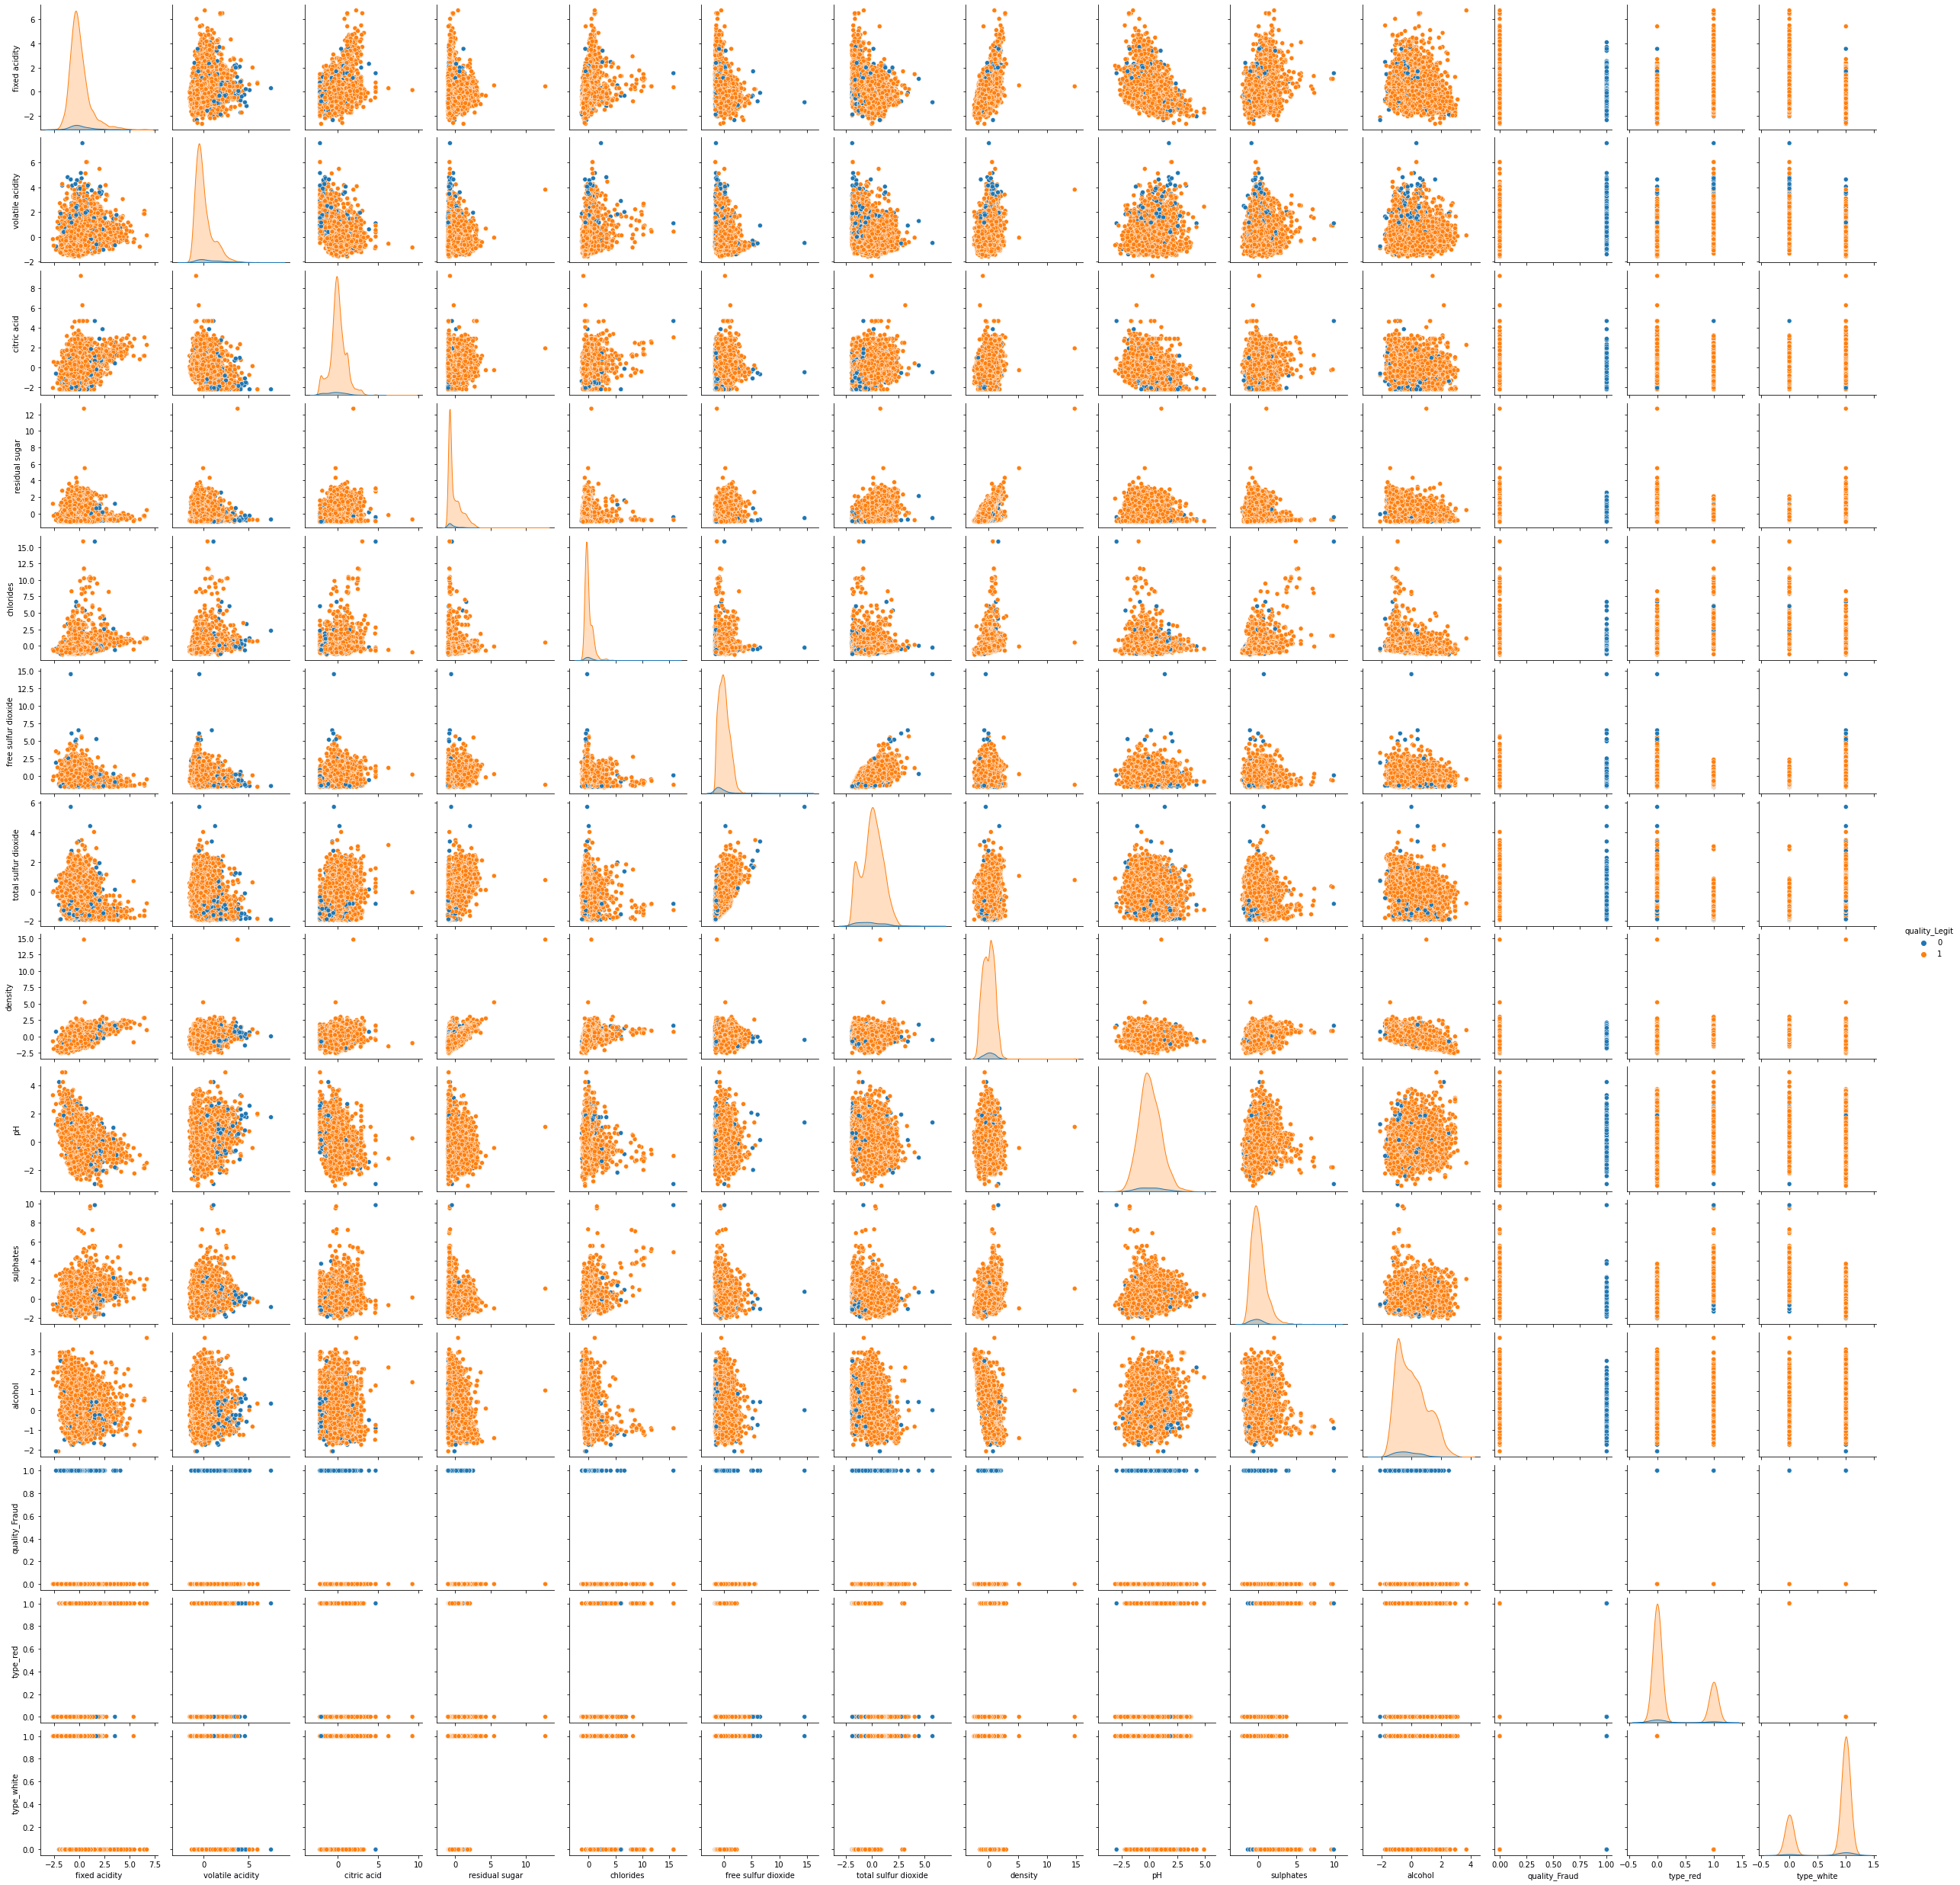

In [10]:
# Se observaran las relaciones entre variables por medio de un pairplot

sns.pairplot(data=data, hue='quality_Legit', diag_kind='kde')

<AxesSubplot:>

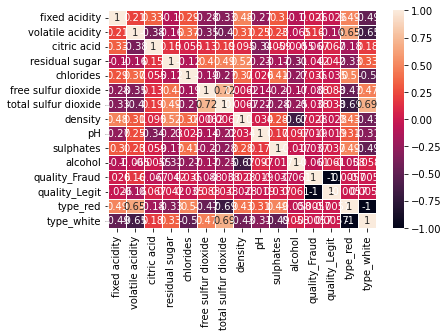

In [11]:
# Es importante observar la correlacion entre variables 

correlation = data.corr()

sns.heatmap(correlation, annot=True, linewidth=.8)

#### Se puede observar que hay variables con alta correlacion, lo cual es de vital importancia para analizar dichas variables ya que pueden dar indicios claros para clasificar si un vino es legitimo o fraudulento.

<AxesSubplot:ylabel='Density'>

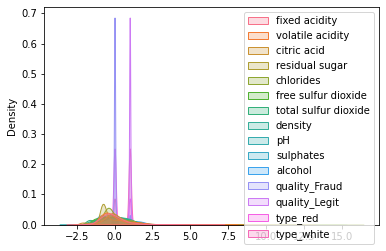

In [12]:
# Graficar las densidades de todas las variables
sns.kdeplot(data=data, shade=True)

<AxesSubplot:xlabel='quality_Legit', ylabel='alcohol'>

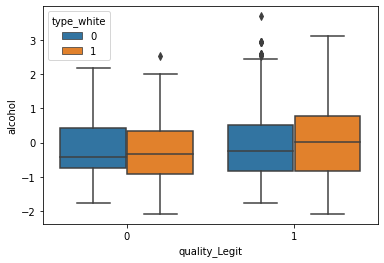

In [13]:
# Graficar los boxplots
sns.boxplot(data=data, x='quality_Legit', y='alcohol', hue='type_white')

<AxesSubplot:xlabel='quality_Legit', ylabel='density'>

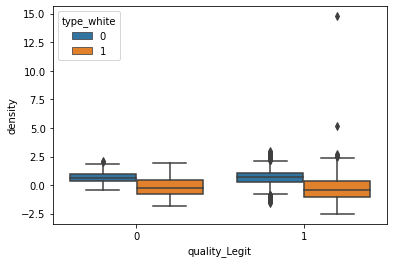

In [14]:
# Graficar los boxplots
sns.boxplot(data=data, x='quality_Legit', y='density', hue='type_white')

<AxesSubplot:xlabel='quality_Legit', ylabel='alcohol'>

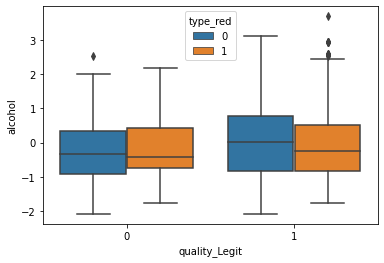

In [15]:
# Graficar los boxplots
sns.boxplot(data=data, x='quality_Legit', y='alcohol', hue='type_red')

<AxesSubplot:xlabel='quality_Legit', ylabel='density'>

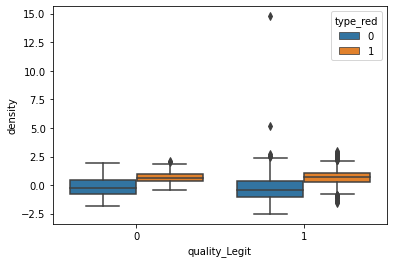

In [16]:
# Graficar los boxplots
sns.boxplot(data=data, x='quality_Legit', y='density', hue='type_red')

# 2.1 - Modelo SVM para clasificar vinos

### Entreno de SVM Lineal



In [17]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Evita que aparezcan avisos innecesarios que afecten la visualizacion del rendimiento del modelo SVM Lineal
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)


# Selecciona las características y la variable objetivo
X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = data['quality_Fraud']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea un modelo SVM lineal y entrena con los datos de entrenamiento
svm_model = SVC(kernel='linear', class_weight='balanced')
svm_model.fit(X_train, y_train)

# Realiza las predicciones en los datos de prueba
y_pred = svm_model.predict(X_test)

print("Parametros de rendimiento para SVM Lineal\n")

# calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# calcular la sensibilidad y especificidad
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

# calcular la puntuación F1
f1_score = classification_report(y_test, y_pred)
print("F1 Score:\n", f1_score)

# calcular la curva ROC y su área debajo de la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# realizar validación cruzada para evaluar la precisión del modelo
scores = cross_val_score(svm_model, X, y, cv=5)
print("Cross Validation Scores:", scores)
print("Mean CV Score:", np.mean(scores))


Parametros de rendimiento para SVM Lineal

Accuracy: 0.7659774436090225
Confusion Matrix:
 [[790 232]
 [ 17  25]]
Sensitivity: 0.5952380952380952
Specificity: 0.7729941291585127
F1 Score:
               precision    recall  f1-score   support

           0       0.98      0.77      0.86      1022
           1       0.10      0.60      0.17        42

    accuracy                           0.77      1064
   macro avg       0.54      0.68      0.52      1064
weighted avg       0.94      0.77      0.84      1064

AUC: 0.684116112198304
Cross Validation Scores: [0.17387218 0.70300752 0.78383459 0.8843985  0.86090226]
Mean CV Score: 0.6812030075187969


### Entreno de SVM Polinomico

In [18]:
# Selecciona las características y la variable objetivo
X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = data['quality_Fraud']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea un modelo SVM Polinomico y entrena con los datos de entrenamiento
svm_model = SVC(kernel='poly', class_weight='balanced')
svm_model.fit(X_train, y_train)

# Realiza las predicciones en los datos de prueba
y_pred = svm_model.predict(X_test)

print("Parametros de rendimiento para SVM Polinomico\n")

# calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# calcular la sensibilidad y especificidad
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

# calcular la puntuación F1
f1_score = classification_report(y_test, y_pred)
print("F1 Score:\n", f1_score)

# calcular la curva ROC y su área debajo de la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# realizar validación cruzada para evaluar la precisión del modelo
scores = cross_val_score(svm_model, X, y, cv=5)
print("Cross Validation Scores:", scores)
print("Mean CV Score:", np.mean(scores))

Parametros de rendimiento para SVM Polinomico

Accuracy: 0.8637218045112782
Confusion Matrix:
 [[893 129]
 [ 16  26]]
Sensitivity: 0.6190476190476191
Specificity: 0.8737769080234834
F1 Score:
               precision    recall  f1-score   support

           0       0.98      0.87      0.92      1022
           1       0.17      0.62      0.26        42

    accuracy                           0.86      1064
   macro avg       0.58      0.75      0.59      1064
weighted avg       0.95      0.86      0.90      1064

AUC: 0.7464122635355512
Cross Validation Scores: [0.67669173 0.80921053 0.82330827 0.88909774 0.90319549]
Mean CV Score: 0.8203007518796992


### Entreno de SVM Radial Basis Function (RBF)

In [19]:
# Selecciona las características y la variable objetivo
X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = data['quality_Fraud']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea un modelo SVM RBF y entrena con los datos de entrenamiento
svm_model = SVC(kernel='rbf', class_weight='balanced')
svm_model.fit(X_train, y_train)

# Realiza las predicciones en los datos de prueba
y_pred = svm_model.predict(X_test)

print("Parametros de rendimiento para SVM RBF\n")

# calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# calcular la sensibilidad y especificidad
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

# calcular la puntuación F1
f1_score = classification_report(y_test, y_pred)
print("F1 Score:\n", f1_score)

# calcular la curva ROC y su área debajo de la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# realizar validación cruzada para evaluar la precisión del modelo
scores = cross_val_score(svm_model, X, y, cv=5)
print("Cross Validation Scores:", scores)
print("Mean CV Score:", np.mean(scores))

Parametros de rendimiento para SVM RBF

Accuracy: 0.8374060150375939
Confusion Matrix:
 [[864 158]
 [ 15  27]]
Sensitivity: 0.6428571428571429
Specificity: 0.8454011741682974
F1 Score:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      1022
           1       0.15      0.64      0.24        42

    accuracy                           0.84      1064
   macro avg       0.56      0.74      0.57      1064
weighted avg       0.95      0.84      0.88      1064

AUC: 0.7441291585127201
Cross Validation Scores: [0.81109023 0.78571429 0.76597744 0.8637218  0.8862782 ]
Mean CV Score: 0.8225563909774436


### Entreno de SVM Sigmoid

In [20]:
# Selecciona las características y la variable objetivo
X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = data['quality_Fraud']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea un modelo SVM Sigmoide y entrena con los datos de entrenamiento
svm_model = SVC(kernel='sigmoid', class_weight='balanced')
svm_model.fit(X_train, y_train)

# Realiza las predicciones en los datos de prueba
y_pred = svm_model.predict(X_test)

print("Parametros de rendimiento para SVM Sigmoid\n")

# calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# calcular la sensibilidad y especificidad
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

# calcular la puntuación F1
f1_score = classification_report(y_test, y_pred)
print("F1 Score:\n", f1_score)

# calcular la curva ROC y su área debajo de la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# realizar validación cruzada para evaluar la precisión del modelo
scores = cross_val_score(svm_model, X, y, cv=5)
print("Cross Validation Scores:", scores)
print("Mean CV Score:", np.mean(scores))

Parametros de rendimiento para SVM Sigmoid

Accuracy: 0.5244360902255639
Confusion Matrix:
 [[534 488]
 [ 18  24]]
Sensitivity: 0.5714285714285714
Specificity: 0.5225048923679061
F1 Score:
               precision    recall  f1-score   support

           0       0.97      0.52      0.68      1022
           1       0.05      0.57      0.09        42

    accuracy                           0.52      1064
   macro avg       0.51      0.55      0.38      1064
weighted avg       0.93      0.52      0.66      1064

AUC: 0.5469667318982387
Cross Validation Scores: [0.1174812  0.56578947 0.67481203 0.65131579 0.62969925]
Mean CV Score: 0.5278195488721804


## Se ha probado con todos lo modelos de SVM que hay para nuestros datos y se ha determinado que el mejor modelo es el SVM Polinomico.

## Por otro lado, haremos un estudio de malla para poder indagar más sobre los parámetros de tal manera que podamos obtener un mejor modelo.

## Búsqueda por malla (Grid Search) para intentar obtener un mejor modelo

In [21]:
malla_parametros = {'C':[0.001, 0.01, 0.1, 0.5, 1],
             'kernel':['linear', 'rbf', 'poly', 'sigmoid'],
              'gamma':['scale', 'auto'],
              'degree':[2, 3, 4],
              'class_weight':['balanced']}

svm = SVC()
malla = GridSearchCV(svm, param_grid = malla_parametros)

malla.fit(X_train, y_train)
malla.best_params_

{'C': 0.001,
 'class_weight': 'balanced',
 'degree': 2,
 'gamma': 'scale',
 'kernel': 'poly'}

### Se puede observar que se ha encontrado un mejor modelo para nuestros datos, por lo cual se hara el ajuste para observar si hay mejora o no.

In [22]:
# Selecciona las características y la variable objetivo
X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = data['quality_Fraud']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea un modelo SVM Polinomico mejorado y entrena con los datos de entrenamiento
svm_model_poly = SVC(C=0.001, kernel='poly', degree=2, class_weight='balanced', gamma='scale')
svm_model_poly.fit(X_train, y_train)

# Realiza las predicciones en los datos de prueba
y_pred = svm_model_poly.predict(X_test)

print("Parametros de rendimiento para SVM Polinomico mejorado\n")

# calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# calcular la sensibilidad y especificidad
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

# calcular la puntuación F1
f1_score = classification_report(y_test, y_pred)
print("F1 Score:\n", f1_score)

# calcular la curva ROC y su área debajo de la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# realizar validación cruzada para evaluar la precisión del modelo
scores = cross_val_score(svm_model_poly, X, y, cv=5)
print("Cross Validation Scores:", scores)
print("Mean CV Score:", np.mean(scores))

Parametros de rendimiento para SVM Polinomico mejorado

Accuracy: 0.9548872180451128
Confusion Matrix:
 [[1012   10]
 [  38    4]]
Sensitivity: 0.09523809523809523
Specificity: 0.9902152641878669
F1 Score:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1022
           1       0.29      0.10      0.14        42

    accuracy                           0.95      1064
   macro avg       0.62      0.54      0.56      1064
weighted avg       0.94      0.95      0.94      1064

AUC: 0.5427266797129812
Cross Validation Scores: [0.95206767 0.95018797 0.95582707 0.95488722 0.95582707]
Mean CV Score: 0.9537593984962406


### Ahora podemos observar que obtuvimos un mejor modelo ya que la precision es del 95%, lo cual asegura que las predicciones seran bastante confiables.

### Posterior a esto, haremos una prediccion para comprobar el funcionamiento del modelo

In [23]:
new_data = pd.DataFrame(
    {'fixed acidity': [2.14247326517042827], 
     'volatile acidity': [0.188832919994], 
     'citric acid': [-1.1928325189113975], 
     'residual sugar': [-2.7447781044754056], 
     'chlorides': [1.569957817031824], 
     'free sulfur dioxide': [0.1001398607084654], 
     'total sulfur dioxide': [-1.4463585242101074], 
     'density': [-1.034992819633769], 
     'pH': [2.8130895095901995], 
     'sulphates': [-2.1930967712748237], 
     'alcohol': [1.9154641642010458]})

prediccion = svm_model_poly.predict(new_data)

print(prediccion)

if (prediccion[0] == 0):
  print('El vino es legitimo!')
elif (prediccion[0] == 1):
  print('El vino es fraudulento!')

[0]
El vino es legitimo!


### Como se puede observar, el modelo realiza predicciones certeramente.

# - Conclusiones -

## En base a todo el proceso, le podemos recomendar a la Distribuidora de Vinos en utilizar un modelo SVM Polinomial con las siguientes caracteristicas:

In [24]:
{'C': 0.001,
 'class_weight': 'balanced',
 'degree': 2,
 'gamma': 'scale',
 'kernel': 'poly'}

{'C': 0.001,
 'class_weight': 'balanced',
 'degree': 2,
 'gamma': 'scale',
 'kernel': 'poly'}

### Con dichas caracteristicas aseguran una precision del 95%, lo cual lo hace un modelo confiable y les permitira detectar eficazmente si los vinos son legitimos o fraudulentos.